## Set Directory and Global Variables

In [389]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [390]:
APPLY_SMOTE = True
# 
FILE_NAME = 'desharnais' # desharnais, maxwell
TARGET = 'Effort' # Effort, effort_D
# 
BASE_DIR = '/content/drive/MyDrive/Seekersoftec/Mrs. Ophori-wares'
# BASE_DIR = '/content/drive/MyDrive/data'
# 
PROCESSED_DATA_DIR = f'{BASE_DIR}/regression/processed_data'
# 
if APPLY_SMOTE:
  REPORTS_DIR = f'{BASE_DIR}/Reports/{FILE_NAME}/SMOTE'
else:
  REPORTS_DIR = f'{BASE_DIR}/Reports/{FILE_NAME}/NON-SMOTE'
# 

## Import Libraries

In [391]:
import time
import math
import csv
import pprint
import statistics
import pandas as pd
import numpy as np
import seaborn as sns
# 
from math import sqrt
from tabulate import tabulate
from collections import Counter
from typing import List, Dict
# 
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, mutual_info_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# 
from scipy.spatial.distance import cdist
from statistics import mean
from scipy.stats import entropy, spearmanr
# 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.pyplot as plt3
import matplotlib.pyplot as plt4
# 
from sys import exit
import pickle
import urllib.parse
from copy import deepcopy
# 
%matplotlib inline

## Load Dataset (Desharnias or Maxwell Dataset )

In [392]:
if APPLY_SMOTE:
  data = pd.read_csv(f'{PROCESSED_DATA_DIR}/{FILE_NAME}_processed_SMOTE.csv').drop(['Unnamed: 0'], axis=1)
else:
  data = pd.read_csv(f'{PROCESSED_DATA_DIR}/{FILE_NAME}_processed.csv').drop(['Unnamed: 0'], axis=1)
# 
data.head(5)
# 

,TeamExp,ManagerExp,YearEnd,Length,Transactions,Entities,PointsAdjust,Envergure,PointsNonAjust,Language,Effort
0,-0.476567,0.814748,1.113045,-0.191518,0.289939,0.220432,0.343285,0.232378,0.312488,0.839032,11328.384606
1,-0.448589,0.821123,1.176508,-0.164314,0.326901,0.225939,0.344462,0.269884,0.342697,0.817223,11372.068227
2,-0.519772,0.830033,1.133635,-0.203787,0.298802,0.236487,0.341432,0.259340,0.338931,0.857712,11391.238532
3,-0.463610,0.827532,1.134378,-0.203913,0.303049,0.210776,0.329431,0.267707,0.311001,0.805868,11434.035097
4,-0.475002,0.843365,1.150256,-0.181917,0.321613,0.212459,0.304483,0.234532,0.335723,0.829760,11393.193024


In [393]:
# Check for nan/null values
data.isna().sum().sum(), data.isnull().sum().sum()

(0, 0)

## Data Test

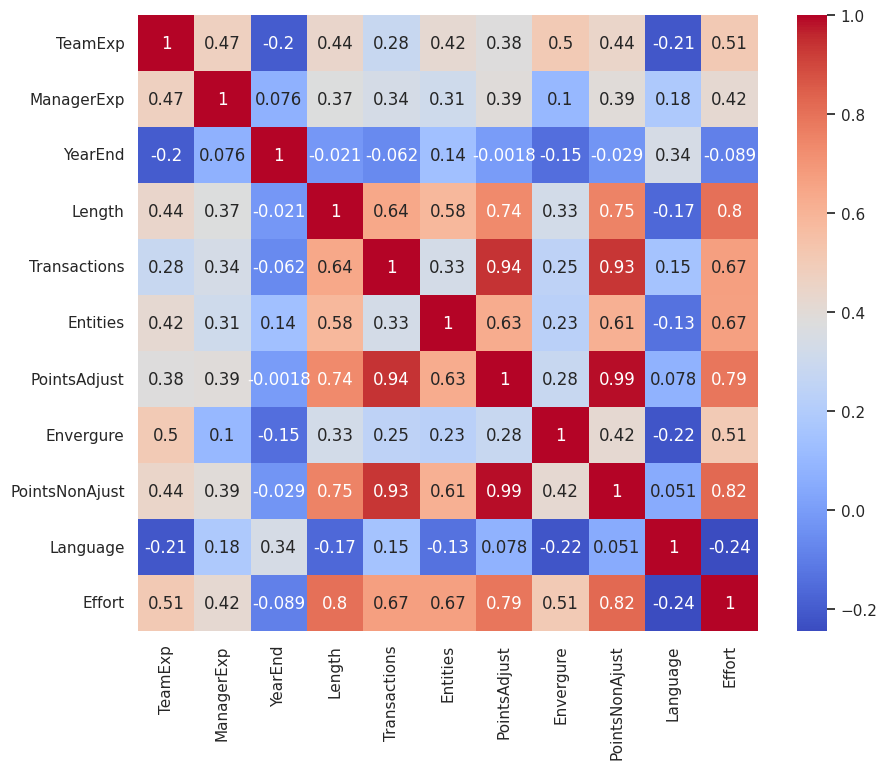

In [394]:
"""
Correlation is a statistical measure that indicates how closely two variables are related to each other. In the context of a dataset, correlation can be used to measure the relationship between two features or between a feature and the target variable.

The correlation coefficient is a value that ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation, a value of -1 indicates a perfect negative correlation, and a value of 0 indicates no correlation. A positive correlation means that as one variable increases, the other variable also tends to increase, while a negative correlation means that as one variable increases, the other variable tends to decrease.

Correlation can be used to identify patterns and relationships in the data and to help understand the underlying structure of the dataset. It can also be used for feature selection, where features with a high correlation to the target variable are selected for the prediction task.

However, it is important to note that correlation does not necessarily imply causation. Just because two variables are correlated does not mean that one variable causes the other. Correlation only measures the strength and direction of the relationship between two variables and does not imply any causal relationship. It is important to perform further analysis and experimentation to determine the cause-and-effect relationship between variables.
"""

def correlation(df: pd.DataFrame):
  # Compute the correlation matrix
  corr = data.corr()

  # Set the plot size
  plt.figure(figsize=(10,8))

  # Plot the correlation heatmap
  sns.heatmap(corr, cmap='coolwarm', annot=True)

  # Show the plot
  plt.show()
# 
correlation(data)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/loc

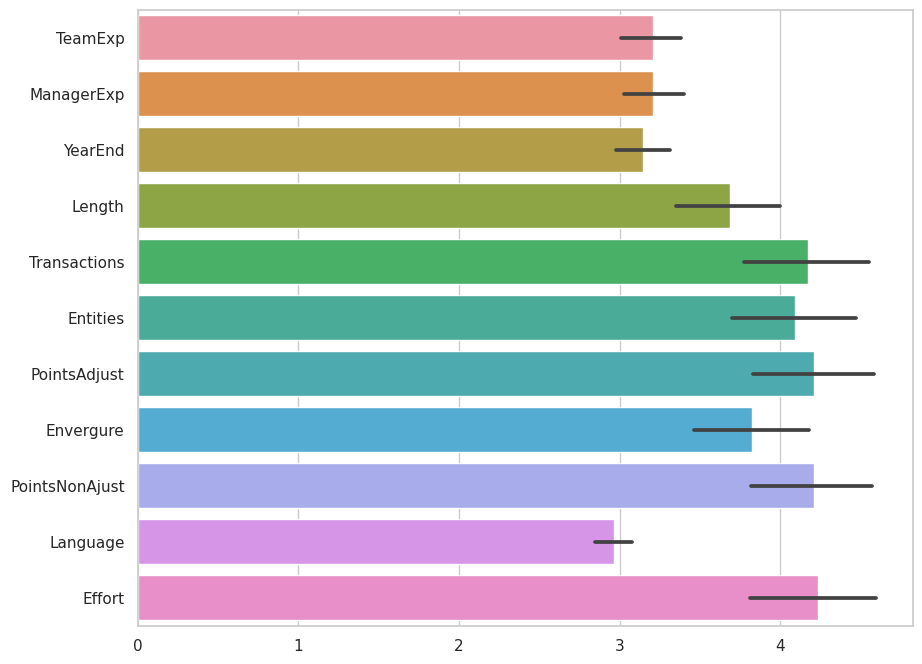

In [395]:
"""
Mutual information is a measure of the mutual dependence between two variables. In the context of a dataset, mutual information can be used to measure the dependence between each feature and the target variable.

More specifically, mutual information is a measure of how much information about the target variable can be gained by knowing the value of a feature. It is based on the concept of entropy from information theory, which measures the uncertainty or randomness of a variable. In the case of mutual information, it measures how much the uncertainty of the target variable is reduced by knowing the value of a feature.

A high mutual information value between a feature and the target variable indicates that the feature contains a lot of information about the target variable, and it is likely to be a good predictor. On the other hand, a low mutual information value indicates that the feature is not very informative about the target variable.
"""

def mutual_info(df: pd.DataFrame):
  # Compute the mutual information matrix
  mi = data.apply(lambda x: pd.Series(pd.Series(data.columns).apply(lambda y: mutual_info_score(x, data[y]))))

  # Set the plot size
  plt.figure(figsize=(10,8))

  # Plot the mutual information bar plot
  sns.barplot(data=mi, orient='h')

  # Show the plot
  plt.show()

# 
mutual_info(data)
# 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/loc

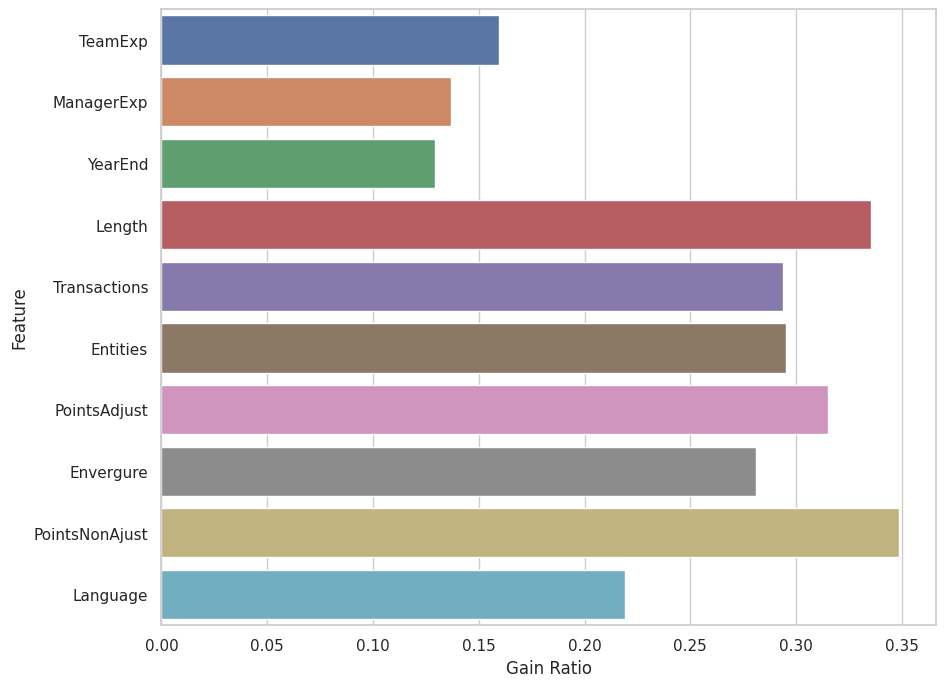

In [396]:
"""
The mutual information gain ratio is a measure of the information gain of a feature with respect to the target variable, normalized by the intrinsic information of the feature. In other words, it measures the degree to which the information provided by a feature is useful for predicting the target variable, taking into account the inherent randomness of the feature itself.

The mutual information gain ratio is calculated as the ratio of the mutual information between the feature and the target variable and the entropy of the feature, normalized by the information entropy of the target variable. It is commonly used in feature selection and ranking tasks, where the goal is to identify the most informative features for predicting the target variable.

A high mutual information gain ratio value for a feature indicates that the feature provides a lot of information gain with respect to the target variable, while taking into account its own intrinsic randomness. This means that the feature is likely to be a good predictor of the target variable and should be considered for inclusion in a prediction model.

On the other hand, a low mutual information gain ratio value indicates that the feature provides little information gain with respect to the target variable, or that its information gain is not significantly greater than its intrinsic randomness. This means that the feature is unlikely to be a good predictor of the target variable and can be safely ignored or removed from the dataset.

Overall, the mutual information gain ratio is a useful measure for identifying informative features in a dataset and can help improve the accuracy and efficiency of machine learning models.
"""
# 
def mi_gain_ratio(df: pd.DataFrame):
  """
    Information gain ratio is the ratio between information gain and
    the entropy of the feature's
    value distribution. The score was introduced in [Quinlan1986]_
    to alleviate overestimation for multi-valued features. See `Wikipedia entry on gain ratio
    <http://en.wikipedia.org/wiki/Information_gain_ratio>`_.
    .. [Quinlan1986] J R Quinlan: Induction of Decision Trees, Machine Learning, 1986.
    \n\n
    Gain Ratio(y,x) = information gain(y,x)/intrinsic value(x)
  """
  # Separate the features and the target variable
  df = df.copy()
  X = df.iloc[:, :-1]
  y = df.iloc[:, -1]

  # Compute the mutual information gain ratio for classification
  mi = mutual_info_regression(X, y, discrete_features='auto', random_state=42)
  mi_gain_ratio = mi / X.apply(lambda x: mutual_info_score(x, y))

  # Create a dataframe of feature names and their corresponding mutual information gain ratios
  mi_df = pd.DataFrame({'Feature': X.columns, 'Gain Ratio': mi_gain_ratio})

  # Set the plot size
  plt.figure(figsize=(10,8))

  # Plot the mutual information gain ratio bar plot
  sns.barplot(data=mi_df, x='Gain Ratio', y='Feature', orient='h')

  # Show the plot
  plt.show()
# 
# 
mi_gain_ratio(data)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/loc

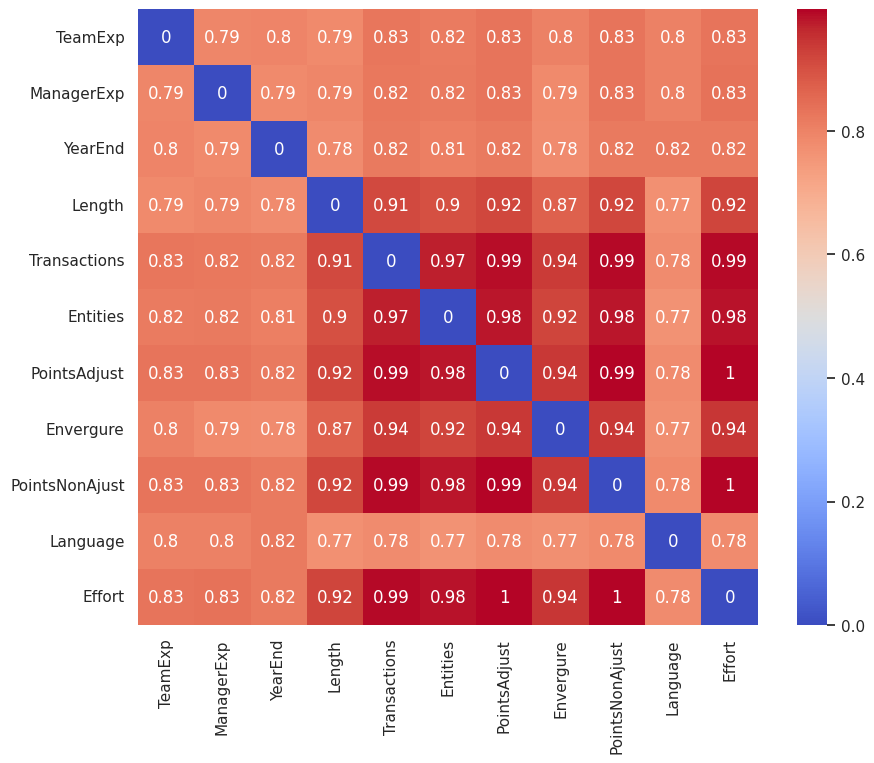

In [397]:
# 
def interact(data: pd.DataFrame):
  # Create a sample DataFrame with four variables
  # df = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [1, 2, 2, 4, 5], 'Z': [2, 4, 6, 8, 10], 'W': [5, 4, 3, 2, 1]})
  df = data.copy()
  # Compute the Symmetrical Uncertainty between all pairs of columns
  n_cols = len(df.columns)
  su_matrix = np.zeros((n_cols, n_cols))
  for i in range(n_cols):
      for j in range(i+1, n_cols):
          su = 2 * mutual_info_score(df.iloc[:, i], df.iloc[:, j]) / (mutual_info_score(df.iloc[:, i], df.iloc[:, i]) + mutual_info_score(df.iloc[:, j], df.iloc[:, j]))
          su_matrix[i, j] = su
          su_matrix[j, i] = su

  # Set the plot size
  plt.figure(figsize=(10,8))

  # Create a heatmap of the Symmetrical Uncertainty matrix
  sns.heatmap(su_matrix, annot=True, cmap='coolwarm', xticklabels=df.columns, yticklabels=df.columns)
  
  # Show the plot
  plt.show()
# 
# 
interact(data)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/loc

Symmetrical Uncertainty between TeamExp and ManagerExp: 0.793361631346111
Symmetrical Uncertainty between TeamExp and YearEnd: 0.797392959181038
Symmetrical Uncertainty between TeamExp and Length: 0.7865303454940535
Symmetrical Uncertainty between TeamExp and Transactions: 0.8274991961240277
Symmetrical Uncertainty between TeamExp and Entities: 0.8174765855972983
Symmetrical Uncertainty between TeamExp and PointsAdjust: 0.8321164570874809
Symmetrical Uncertainty between TeamExp and Envergure: 0.8044822531014049
Symmetrical Uncertainty between TeamExp and PointsNonAjust: 0.829725644837041
Symmetrical Uncertainty between TeamExp and Language: 0.8024203330848533
Symmetrical Uncertainty between TeamExp and Effort: 0.8315252382486885
Symmetrical Uncertainty between ManagerExp and TeamExp: 0.7933616313461112
Symmetrical Uncertainty between ManagerExp and YearEnd: 0.7861681422247623
Symmetrical Uncertainty between ManagerExp and Length: 0.7905780647316378
Symmetrical Uncertainty between Manag

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/loc

Symmetrical Uncertainty between Transactions and YearEnd: 0.8192632350741995
Symmetrical Uncertainty between Transactions and Length: 0.9117802034529118
Symmetrical Uncertainty between Transactions and Entities: 0.9734434155164082
Symmetrical Uncertainty between Transactions and PointsAdjust: 0.9886595176097988
Symmetrical Uncertainty between Transactions and Envergure: 0.935518852749974
Symmetrical Uncertainty between Transactions and PointsNonAjust: 0.9907214234989262
Symmetrical Uncertainty between Transactions and Language: 0.7814983346780299
Symmetrical Uncertainty between Transactions and Effort: 0.9917778065272045
Symmetrical Uncertainty between Entities and TeamExp: 0.8174765855972981
Symmetrical Uncertainty between Entities and ManagerExp: 0.8199336639041062
Symmetrical Uncertainty between Entities and YearEnd: 0.8081270005908284
Symmetrical Uncertainty between Entities and Length: 0.9003408724952457
Symmetrical Uncertainty between Entities and Transactions: 0.9734434155164082

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/loc

Symmetrical Uncertainty between PointsNonAjust and Envergure: 0.9391119063418731
Symmetrical Uncertainty between PointsNonAjust and Language: 0.7841078998009109
Symmetrical Uncertainty between PointsNonAjust and Effort: 0.9969324412362298
Symmetrical Uncertainty between Language and TeamExp: 0.8024203330848534
Symmetrical Uncertainty between Language and ManagerExp: 0.8048737389398496
Symmetrical Uncertainty between Language and YearEnd: 0.8214451860334957
Symmetrical Uncertainty between Language and Length: 0.7683288147593095
Symmetrical Uncertainty between Language and Transactions: 0.78149833467803
Symmetrical Uncertainty between Language and Entities: 0.7669882770456835
Symmetrical Uncertainty between Language and PointsAdjust: 0.7816137017232294
Symmetrical Uncertainty between Language and Envergure: 0.7742790311708295
Symmetrical Uncertainty between Language and PointsNonAjust: 0.7841078998009111
Symmetrical Uncertainty between Language and Effort: 0.7811852536639087
Symmetrical 

<Figure size 1000x800 with 0 Axes>

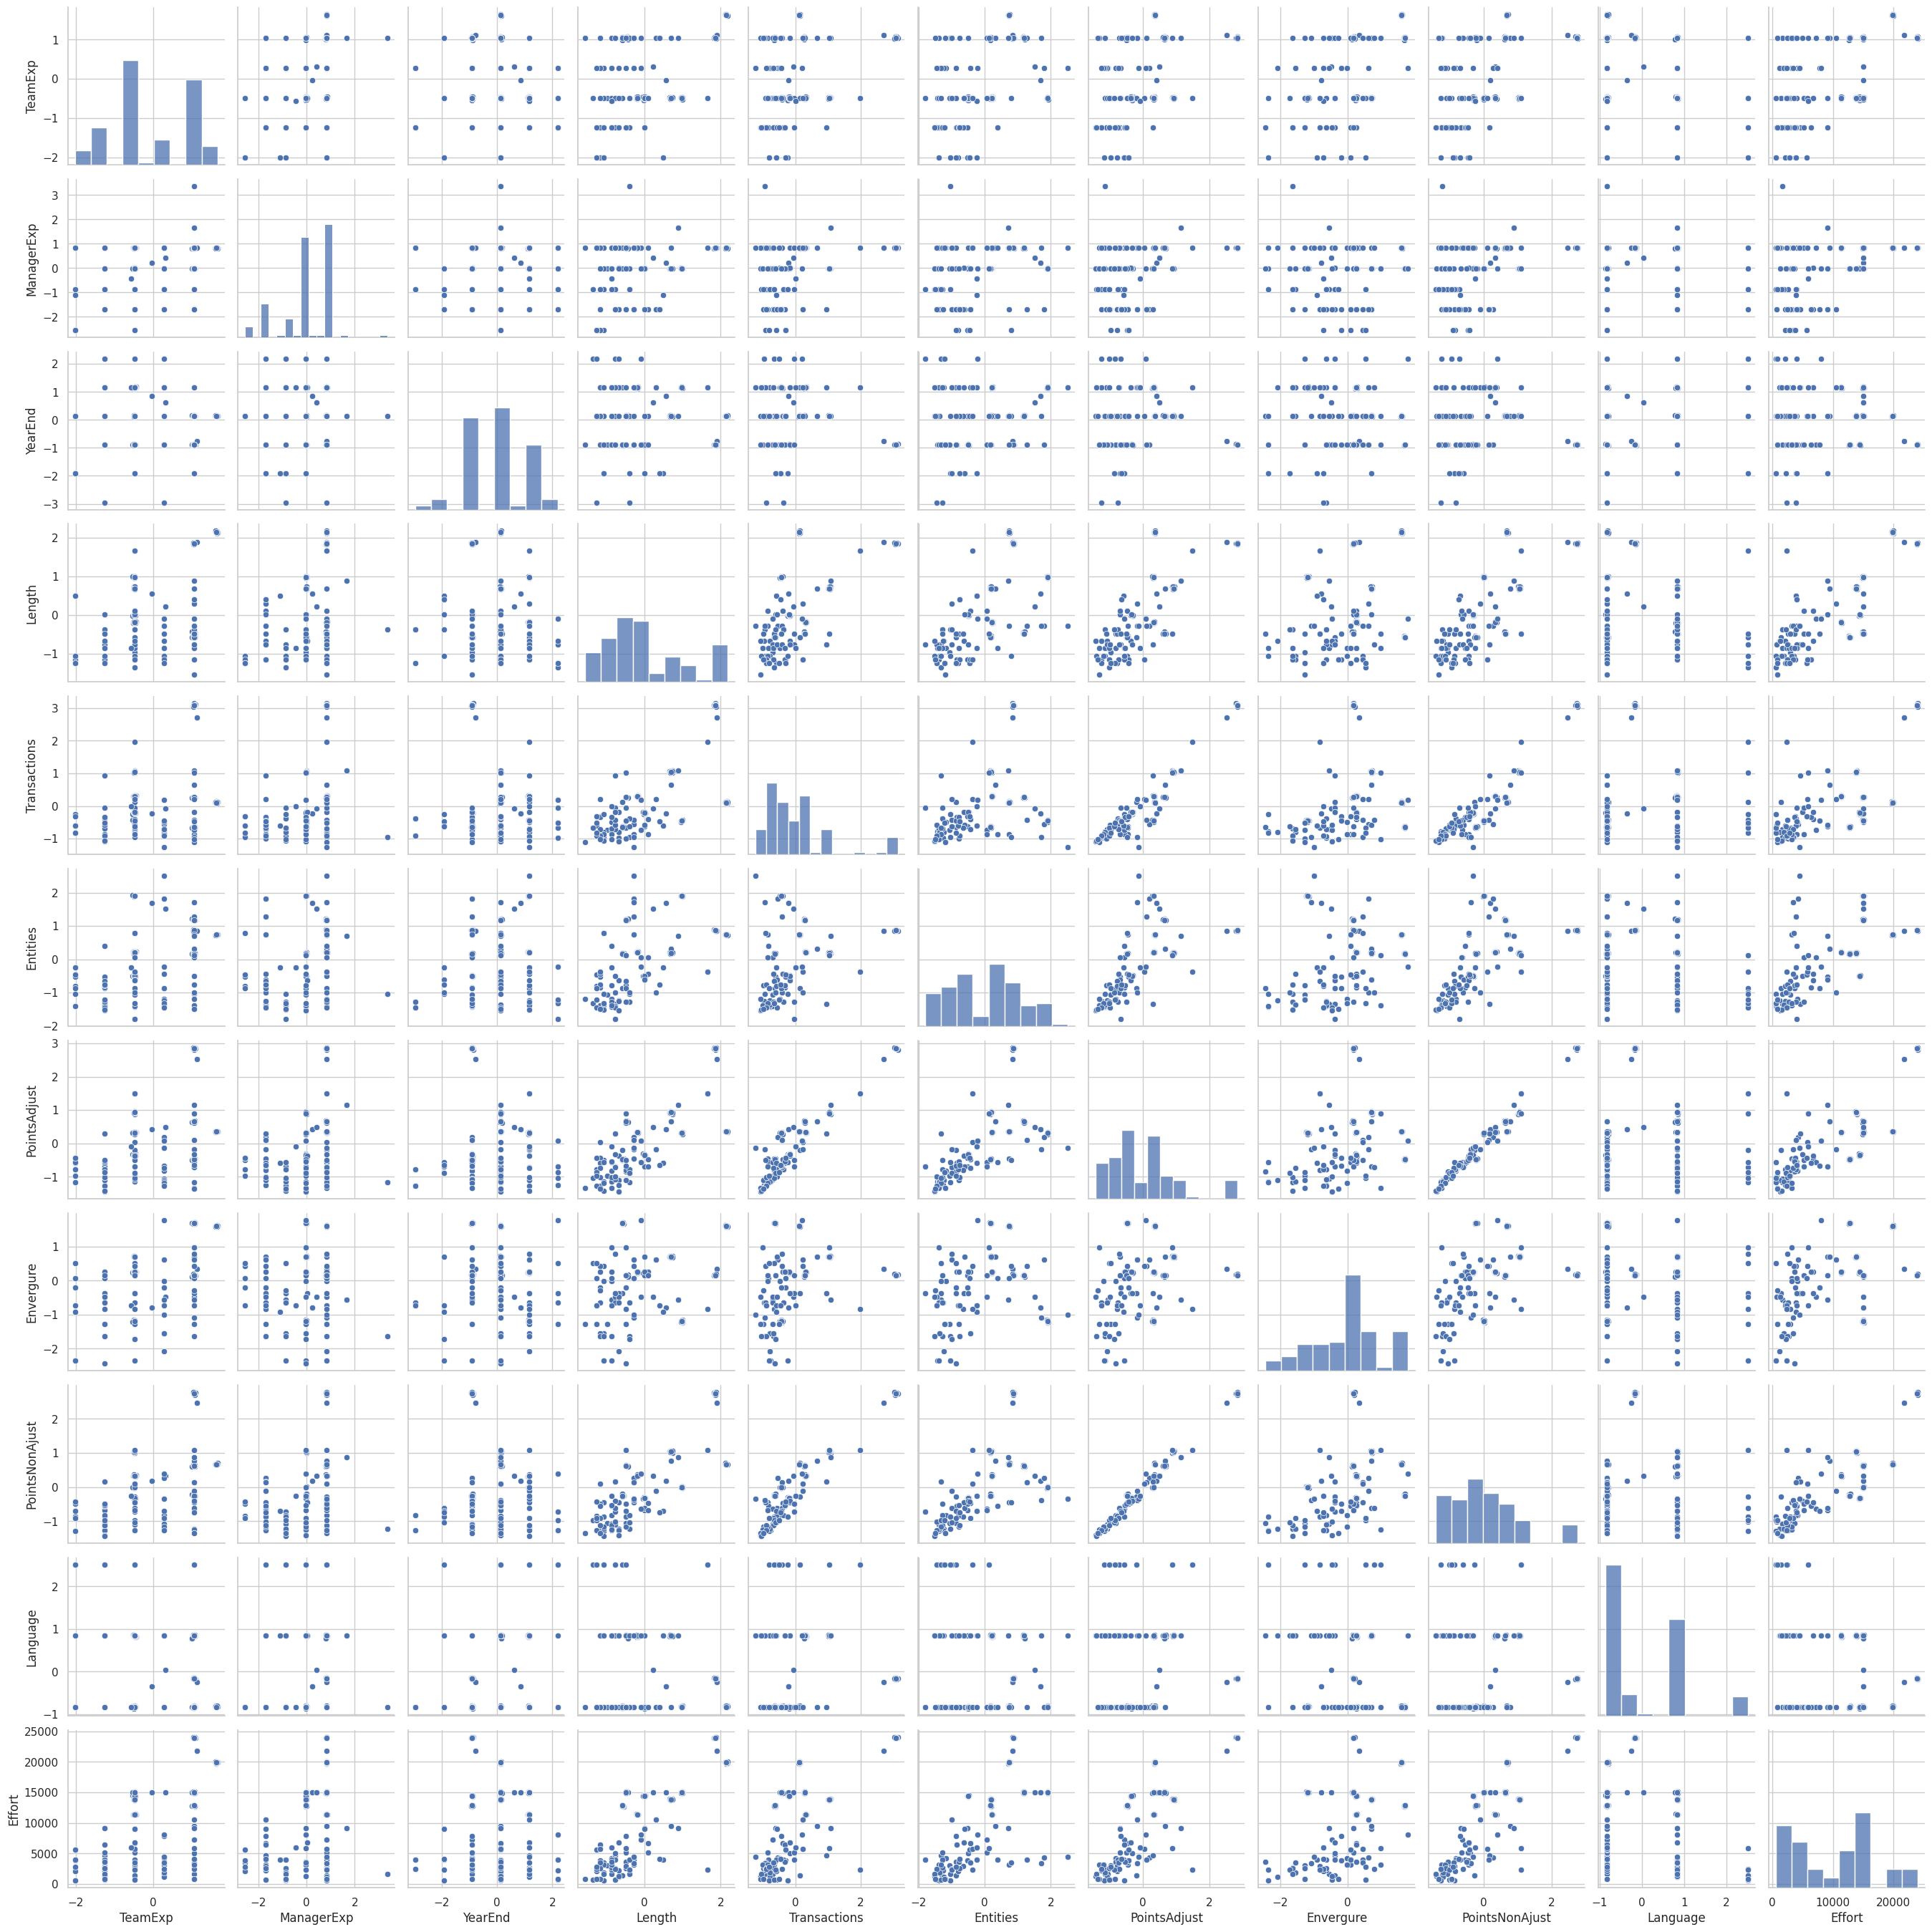

In [398]:
"""
Symmetrical Uncertainty is a measure of the amount of mutual information shared by two random variables. It is often used in information theory and machine learning to quantify the relationship between two variables.

Symmetrical Uncertainty (SU) is a normalized version of the mutual information (MI) between two variables. Mutual information measures the amount of information that two variables share. It is defined as the difference between the entropy of the joint distribution and the sum of the entropies of the individual distributions:

MI(X,Y) = H(X) + H(Y) - H(X,Y)

where H(X) is the entropy of variable X, H(Y) is the entropy of variable Y, and H(X,Y) is the joint entropy of X and Y.

Symmetrical Uncertainty is defined as the ratio of the mutual information to the average of the entropies of the two variables:

SU(X,Y) = 2 * MI(X,Y) / (H(X) + H(Y))

The SU value ranges from 0 to 1, where 0 indicates no relationship between the variables, and 1 indicates a perfect relationship. SU is symmetric, which means that SU(X,Y) is the same as SU(Y,X).

Symmetrical Uncertainty is useful in feature selection and feature ranking, as it can help identify variables that are highly correlated with the target variable. It is also used in clustering and classification algorithms to identify variables that are informative for the given task.
"""
# 
def symmetrical_uncertainty(data: pd.DataFrame):
  # Create a sample DataFrame with two variables X and Y
  # df = pd.DataFrame({'X': [1, 2, 3, 4, 5], 'Y': [1, 2, 2, 4, 5]})
  df = data.copy()

  # Compute the Symmetrical Uncertainty between all pairs of columns
  for col1 in df.columns:
      for col2 in df.columns:
          if col1 == col2:
              continue
          su = 2 * mutual_info_score(df[col1], df[col2]) / (mutual_info_score(df[col1], df[col1]) + mutual_info_score(df[col2], df[col2]))
          print(f'Symmetrical Uncertainty between {col1} and {col2}: {su}')

  # Set the plot size
  plt.figure(figsize=(10,8))

  # Plot scatterplots of all pairs of columns
  sns.pairplot(df)
  
  # Show the plot
  plt.show()

# 
symmetrical_uncertainty(data)

## Utils functions

In [399]:
"""
Question:
what plotting graph between actual and predicted values what type of graphs are recommend especially if the points are scattered?

Answer:
When you want to plot the relationship between actual and predicted values, and the points are scattered, the most common type of plot used is a scatter plot. Scatter plots are useful for visualizing the relationship between two continuous variables, and they allow you to see the individual data points as well as any trends or patterns in the data.

In addition to scatter plots, you can also use other types of plots to visualize the relationship between actual and predicted values, depending on the specific context of your data. Here are some other types of plots you might consider:

Line plot: A line plot can be used to show the trend or pattern in the data, if there is one. The actual and predicted values can be plotted on the same plot, with different line styles or colors to distinguish between them.

Histogram: A histogram can be used to show the distribution of the actual and predicted values separately. This can be useful if you want to compare the distribution of the two variables or identify any outliers.

Density plot: A density plot is similar to a histogram, but it shows the density of the data rather than the count. 
This can be useful if you want to compare the shape of the distribution of the actual and predicted values.

Violin plot: A violin plot is a type of plot that shows the distribution of the data as a kernel density estimate and a box plot. This can be useful if you want to compare the distribution of the actual and predicted values and see how they differ in terms of skewness or kurtosis.

Overall, the choice of plot depends on the nature of your data and the specific question you are trying to answer with the plot. A scatter plot is a good starting point, but you may want to consider other types of plots to get a more complete picture of the relationship between actual and predicted values.
"""

def dict_to_list_of_tuples(dict):
  """
  Converts a dictionary to a list of tuples.

  Args:
    dict: The dictionary to convert.

  Returns:
    A list of tuples.
  """

  list_of_tuples = []
  for key, value in dict.items():
    list_of_tuples.append((key, value))

  return list_of_tuples

def tabulate(features: dict, headers: list) -> str:
    """
        Tabulate Features
    """
    _table = []
    for key in features:
        _table.append((key, features[key]))
    # 
    return tabulate(_table, headers=headers)


def plot_graph(df: pd.DataFrame, model_name='', graph_type='scatter_line', label1='Actual Values', label2='Predicted Values',
               title='Actual vs. Predicted Scores'):
    """
        Plot Graphs
    """
    # if model_name == 'lasso':
    #   pass
    # else:
    df = df.copy()
    label1_values = df[label1]
    label2_values = df[label2]

    sns.set_style('whitegrid')
    if graph_type == 'line':
        plt.plot(df[label1], label=label1)
        plt.plot(df[label2], label=label2)
        plt.xlabel('Data Points')
        plt.ylabel('Scores')

    if graph_type == 'bar':
        # create a bar chart of the data using Seaborn
        sns.barplot(x=label1, y=label2, data=df)
        # rotate the x-axis labels by 90 degrees
        plt.xticks(rotation=60)
        # 
        plt.xlabel(label1)
        plt.ylabel(label2)

    if graph_type == 'scatter_line':
      r_squared = r2_score(label1_values, label2_values)
      sns.scatterplot(x=label2_values, y=label1_values, label='Actual')
      sns.lineplot(x=label2_values, y=label2_values, color='gray', linestyle='--', label='Predicted')
      
      plt.text(0.95, 0.05, f'R-squared: {r_squared:.4f}', fontsize=10,
             horizontalalignment='right', verticalalignment='bottom', transform=plt.gca().transAxes)
      plt.xlabel('Predicted Values')
      plt.ylabel('Actual Values')

    plt.title(title)
    plt.legend()
    plt.show()

# 

## Define Learning Algorithms

### Base Learners

In [400]:
# 
# the_model.fit(desh_X_train, desh_Y_train)#fit the model
# pred=the_model.predict(desh_X_test)#make prediction on test set
# error = sqrt(mean_squared_error(desh_Y_test,pred))#calculate rmse
# desh_rmse_val.append(error)#store rmse values
# print('RMSE value for k= ',K, ' is: ',error)
# 
class BaseLearners:
  """
    Base Learners: K-NN and Lasso
  """
  def __init__(self, dataframe: pd.DataFrame, selected_features: list, target_variable: str = TARGET, test_size: float = 0.25, n_cv: int = 10) -> None:
    # Dataframe
    self.dataframe = dataframe

    # features 
    self.selected_features = selected_features

    # target column 
    self.target_variable = target_variable

    # Get the feature vector
    self.X = self.dataframe[self.selected_features].values
    
    # Get the target vector
    self.y = self.dataframe[self.target_variable].values
    
    # splitting the dataset into  training and test set
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_size, random_state=42, shuffle=True)
    # print(self.y_test)
    # self.dataframe = pd.DataFrame()
    # self.eval_methods = ['MSE', 'RMSE', 'MAE', 'R^2', 'explained_variance']
    self.n_cv = n_cv

    self.gridsearch_results = None

  def show_data_split(self):
    """
      Shows the splitted data (e.g. Train/Test) 
    """
    # Put X_train and y_train into a pandas DataFrame
    df_train = pd.DataFrame(self.X_train, columns=self.selected_features)
    df_train[self.target_variable] = self.y_train
    # reset the index
    # df_train = df_train.reset_index()
    # Randomize the arrangement of the rows
    df_train = df_train.sample(frac=1, random_state=42)

    # Put X_test and y_test into a pandas DataFrame
    df_test = pd.DataFrame(self.X_test, columns=self.selected_features)
    df_test[self.target_variable] = self.y_test
    # Randomize the arrangement of the rows
    df_test = df_test.sample(frac=1, random_state=42)
    # reset the index
    # df_test = df_test.reset_index()
 
    return {'train': df_train,
            'test': df_test}
    
  def show_gridsearch_results(self):
    """
      GridSearchcv results in tabular form
    """
    # get the results as a pandas DataFrame
    results = pd.DataFrame(self.gridsearch_results)
    # print the results
    # print(results[['param_alpha', 'mean_test_score', 'rank_test_score']])
    return results

  def evaluate_model(self, model, with_table = False, return_train_score = False) -> Dict:
    """
        Computes evaluation metrics for a regression model based on actual and predicted values.
    
        Parameters:
        model: (Any): sklearn model
        with_table: (bool): True or False
        return_train_score: (bool): True or False

        Returns:
        dict: A dictionary containing evaluation metrics including MSE, RMSE, MAE, R^2, and explained variance.
    """
    # ['MSE', 'RMSE', 'MAE', 'R^2', 'explained_variance']
    # explained_variance_score(self.y_test, test_predicted)
    if hasattr(model, 'coef_'): 
      coefs = pd.DataFrame(list(zip(self.selected_features, model.coef_)), columns=['Features', 'Coefficient Estimate'])
      # swap columns Features and Coefficient Estimate
      # coefs['Features'], coefs['Coefficient Estimate'] = coefs['col2'], coefs['col1']
    else:
      coefs = pd.DataFrame()

    # Compute the train scores
    train_scores = {}
    if return_train_score:
      train_predicted = model.predict(self.X_train)
      train_mse = mean_squared_error(self.y_train, train_predicted)
      train_r2 = r2_score(self.y_train, train_predicted)
      train_scores = {'MSE': train_mse, 
                      'RMSE': np.sqrt(train_mse), 
                      'MAE': mean_absolute_error(self.y_train, train_predicted), 
                      'R^2': train_r2, 
                      'unexplained_variance': 1 - train_r2,
                      'lasso_coefs': coefs}

    # Compute the test scores
    test_predicted = model.predict(self.X_test)
    test_mse = mean_squared_error(self.y_test, test_predicted)
    test_r2 = r2_score(self.y_test, test_predicted)
    test_scores = {'MSE': test_mse, 
                   'RMSE': np.sqrt(test_mse), 
                   'MAE': mean_absolute_error(self.y_test, test_predicted), 
                   'R^2': test_r2, 
                   'unexplained_variance': 1 - test_r2}
                   
    # if !coefs.empty: 
    #   test_scores[''] =  coefs   
    # Create a DataFrame to store the actual scores and predicted scores
    values_table = pd.DataFrame()
    if with_table:
      values_table = pd.DataFrame({'Actual Values': self.y_test, 
                                   'Predicted Values': test_predicted.tolist()})

    return {'train_scores': train_scores,
            'test_scores': test_scores,
            'values_table': values_table}

  def lasso(self, param_grid: dict = {'alpha': [0.1, 1, 10, 100]}, scoring: str = 'r2', **kwargs):
    """
      Lasso:
        \n
        - Define a hyperparameter grid: param_grid = {'alpha': [0.1, 1, 10, 100]}
        \n
        - Define a scoring metric: scoring = 'neg_mean_squared_error' OR 'neg_mean_absolute_error' OR 'explained_variance' OR 'r2'
    """

    # Create a Lasso regression model
    lasso = Lasso()

    # Create a GridSearchCV object
    grid_search = GridSearchCV(lasso, param_grid=param_grid, scoring=scoring, cv=self.n_cv, **kwargs)

    # Fit the GridSearchCV object to the training data
    grid_search.fit(self.X_train, self.y_train)

    # Print the best hyperparameters and cross-validated score
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best cross-validated score:", grid_search.best_score_)

    # 
    # print(list(zip(reg.coef_,all_desh_feature)))
    # print('Lasso Deshanais R Squared for training set ', round(reg.score(desh_X_train,desh_Y_train)*100,2))
    # print('Lasso Deshanais R Squared for testing set ', round(reg.score(desh_X_test,desh_Y_test)*100,2))
    
    self.gridsearch_results = grid_search.cv_results_
    return grid_search.best_estimator_

  def knn(self, K: int = 5, param_grid: dict = {'n_neighbors': [3, 5, 7, 9, 11]}, scoring: str = 'r2',  **kwargs):
    """
      K-NN:
        \n
        - Define the parameter grid to search over: param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
        \n
        - Define a scoring metric: scoring = 'neg_mean_squared_error' OR 'neg_mean_absolute_error' OR 'explained_variance' OR 'r2'
    """
    # Create a KNN regressor object
    knn = KNeighborsRegressor()

    # Create a GridSearchCV object and fit it to the data
    grid_search = GridSearchCV(knn, param_grid, scoring='r2', cv=self.n_cv, **kwargs)
    grid_search.fit(self.X_train, self.y_train)

    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    self.gridsearch_results = grid_search.cv_results_
    return grid_search.best_estimator_

# 
# R-squared score (default): This measures the proportion of the variance in the target variable that is explained by the model. It takes values between 0 and 1, where 1 indicates a perfect fit and 0 indicates no relationship between the model and the target variable. The r2_score function from the sklearn.metrics module can be used as the scoring function for GridSearchCV.

# Mean squared error (MSE): This measures the average squared difference between the predicted and actual values of the target variable. A smaller MSE indicates a better fit. The mean_squared_error function from the sklearn.metrics module can be used as the scoring function for GridSearchCV.

# Mean absolute error (MAE): This measures the average absolute difference between the predicted and actual values of the target variable. A smaller MAE indicates a better fit. The mean_absolute_error function from the sklearn.metrics module can be used as the scoring function for GridSearchCV.

# Explained variance score: This measures the proportion of the variance in the target variable that is explained by the model. It takes values between 0 and 1, where 1 indicates a perfect fit and 0 indicates no relationship between the model and the target variable. The explained_variance_score function from the sklearn.metrics module can be used as the scoring function for GridSearchCV.
# 

### Stacked Learner

In [401]:
class StackedLearner(BaseLearners):
  """
    Stacking the Base Learning Algorithms K-NN and Lass with Lasso as the Meta algorithm
  """
  def __init__(self, dataframe: pd.DataFrame, selected_features: list, 
               target_variable: str = TARGET, test_size: float = 0.25, 
               learners: list = None, n_cv: int = 5):
    super().__init__(dataframe, selected_features, target_variable, test_size, n_cv)
    
    self.learners = learners if learners is not None else []

  def learn(self, param_grid: dict = {'final_estimator__fit_intercept': [True, False]}, scoring: str = 'r2'):
    # Define the base estimators to use in the stacking regressor
    if not self.learners:
      knn_model = self.knn(param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 7, 9, 11]})
      lasso_model = self.lasso(param_grid = {'alpha': [i for i in range(1, 100)]})

      self.learners = [('knn', knn_model), ('lasso', lasso_model)]

    # Create a stacking regressor object with a linear regression meta-estimator
    meta_estimator = self.lasso(param_grid = {'alpha': [i for i in range(1, 100)]})
    stacking_regressor = StackingRegressor(estimators=self.learners, final_estimator=meta_estimator)

    # param_grid = {'final_estimator__fit_intercept': [True, False],
    #               'knn__n_neighbors': [3, 5, 7, 9, 11],
    #               'lasso__alpha': [0.1, 1, 10]}

    # Create a GridSearchCV object and fit it to the data
    grid_search = GridSearchCV(stacking_regressor, param_grid, scoring=scoring, cv=self.n_cv)
    grid_search.fit(self.X_train, self.y_train)

    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)

    self.gridsearch_results = grid_search.cv_results_
    return grid_search.best_estimator_
# 

## Learning Algorithms (Without clustering)

In [402]:
base_learners = BaseLearners(data, selected_features = data.columns[:-1].to_list())
# 
data_split = base_learners.show_data_split()

In [403]:
# 
data_split['train']
# 

,TeamExp,ManagerExp,YearEnd,Length,Transactions,Entities,PointsAdjust,Envergure,PointsNonAjust,Language,Effort
30,-1.248950,-0.018888,0.131773,0.007412,-0.619216,-0.525408,-0.696982,0.162186,-0.675359,0.840533,9135.000000
67,-0.498803,-0.001902,1.152470,0.953984,-0.490354,1.904772,0.325048,-1.197900,-0.008901,-0.816984,14969.962096
62,1.050009,0.819632,-0.897301,1.832558,3.069220,0.867987,2.863781,0.170628,2.742024,-0.150081,23898.320763
47,-1.248950,-1.705033,0.131773,-0.770875,-0.579577,-1.447553,-0.994572,-0.466877,-1.012184,2.506467,710.000000
42,1.044258,0.824184,0.131773,0.688413,0.659131,0.317047,0.656443,0.701383,0.767045,-0.825402,9520.000000
...,...,...,...,...,...,...,...,...,...,...,...
71,-1.248950,-1.705033,1.158783,-0.479017,-0.995783,-0.787251,-1.100563,-1.275671,-1.162765,-0.825402,2583.000000
14,-0.495158,-0.017136,0.109866,0.684620,1.053886,0.200062,0.921849,0.725381,1.049938,0.839811,13866.040390
92,0.279855,-0.018888,-0.895237,-1.062733,-0.871912,-1.322324,-1.190248,-0.017546,-1.158802,-0.825402,3136.000000
51,-0.484548,-1.705033,-1.922247,0.007412,-0.574622,-0.605099,-0.688829,0.701383,-0.604031,-0.825402,9051.000000


In [404]:
# 
data_split['test']
# 

,TeamExp,ManagerExp,YearEnd,Length,Transactions,Entities,PointsAdjust,Envergure,PointsNonAjust,Language,Effort
26,-0.472431,-0.022722,0.143340,0.679351,1.025065,0.195942,0.956430,0.689813,1.048224,0.850665,13746.008270
13,-1.248950,-1.705033,1.158783,-0.770875,0.936601,-1.333708,0.293627,-0.377010,0.160760,-0.825402,4620.000000
24,1.044258,-1.705033,1.158783,0.299269,0.208241,-0.992173,-0.183333,0.611517,-0.104738,-0.825402,10577.000000
21,-0.475002,0.843365,1.150256,-0.181917,0.321613,0.212459,0.304483,0.234532,0.335723,0.829760,11393.193024
15,-0.496335,-0.033229,1.133001,0.996950,-0.449018,1.883568,0.296364,-1.159078,-0.019603,-0.820223,14969.503918
29,-0.484548,-0.018888,-1.922247,-0.381732,-0.634080,-1.003557,-0.880428,-1.725002,-1.024072,0.840533,2275.000000
19,1.048734,0.828269,-0.861547,1.859603,3.151492,0.851736,2.815097,0.173133,2.745228,-0.158133,24059.461063
12,1.044258,-1.705033,-0.895237,-0.284446,-0.430932,1.273346,0.102028,0.431784,0.148872,-0.825402,3948.000000
8,-1.248950,-0.018888,0.131773,-0.673589,-1.089925,-1.527245,-1.442996,-0.466877,-1.412412,0.840533,1267.000000
16,-0.460527,-0.032977,-0.899507,-0.029503,-0.192936,-0.511525,-0.316550,0.226506,-0.331508,-0.825270,14366.050859


### Lasso

In [405]:
# 
param_grid = {'alpha': [i for i in range(1, 100)]}
lasso_model = base_learners.lasso(param_grid=param_grid, scoring='r2')
# 
evaluations = base_learners.evaluate_model(lasso_model, with_table = True, return_train_score = True)
# 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.474e+07, tolerance: 4.308e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.442e+07, tolerance: 4.367e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.235e+07, tolerance: 4.414e

Best hyperparameters: {'alpha': 99}
Best cross-validated score: 0.8204992062042409


In [406]:
evaluations['train_scores']

{'MSE': 5698035.859781624,
 'RMSE': 2387.05589791727,
 'MAE': 1668.1549578891481,
 'R^2': 0.8780277962522609,
 'unexplained_variance': 0.1219722037477391,
 'lasso_coefs':          Features  Coefficient Estimate
 0         TeamExp             -0.000000
 1      ManagerExp            527.892745
 2         YearEnd            -15.270429
 3          Length           1382.875020
 4    Transactions              0.000000
 5        Entities           1741.282715
 6    PointsAdjust              0.000000
 7       Envergure           1038.763820
 8  PointsNonAjust           2702.831660
 9        Language          -1237.435563}

In [407]:
evaluations['train_scores']['lasso_coefs']
# 

,Features,Coefficient Estimate
0,TeamExp,-0.000000
1,ManagerExp,527.892745
2,YearEnd,-15.270429
3,Length,1382.875020
4,Transactions,0.000000
5,Entities,1741.282715
6,PointsAdjust,0.000000
7,Envergure,1038.763820
8,PointsNonAjust,2702.831660
9,Language,-1237.435563


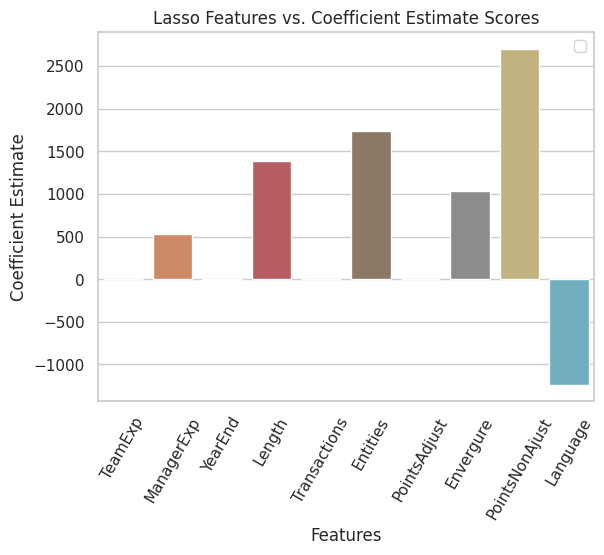

In [408]:
plot_graph(df = evaluations['train_scores']['lasso_coefs'], 
           graph_type='bar', 
           label1='Features',
           label2='Coefficient Estimate', 
           title='Lasso Features vs. Coefficient Estimate Scores')
# 

In [409]:
evaluations['test_scores']

{'MSE': 13125806.107664604,
 'RMSE': 3622.955438266472,
 'MAE': 2489.146840292057,
 'R^2': 0.6835950346431889,
 'unexplained_variance': 0.31640496535681106}

In [410]:
evaluations['values_table']

,Actual Values,Predicted Values
0,7252.000000,9536.105938
1,2149.000000,3750.088214
2,12710.730114,11856.674455
3,14446.029890,9856.250919
4,4277.000000,14546.885434
5,6699.000000,8810.858807
6,23940.000000,22599.860513
7,5635.000000,6330.954362
8,1267.000000,1351.958605
9,2989.000000,3951.371565


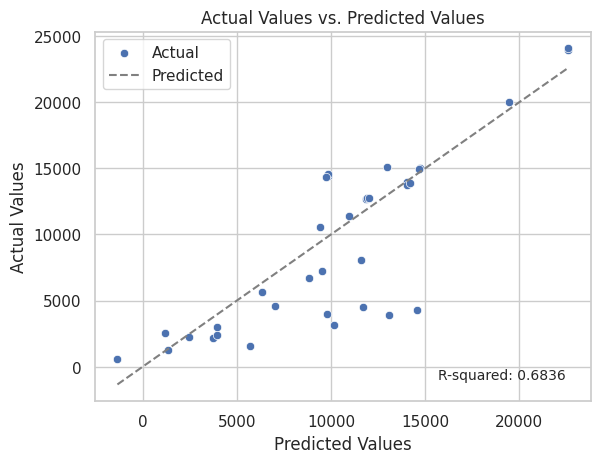

In [411]:
# 
plot_graph(df = evaluations['values_table'], 
           graph_type='scatter_line', 
           label1='Actual Values',
           label2='Predicted Values', 
           title='Actual Values vs. Predicted Values')
# 
# 

In [412]:
# 
base_learners.show_gridsearch_results()
# 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002895,0.000635,0.000515,0.000110,1,{'alpha': 1},0.858686,0.776648,0.818701,0.851295,0.778365,0.967825,0.849611,0.944427,0.779176,0.565042,0.818978,0.105338,27
1,0.002798,0.001026,0.000496,0.000128,2,{'alpha': 2},0.859030,0.779041,0.819061,0.851820,0.782635,0.968305,0.845242,0.944194,0.778923,0.563556,0.819181,0.105409,20
2,0.002119,0.000248,0.000422,0.000059,3,{'alpha': 3},0.859319,0.780758,0.819297,0.852226,0.785728,0.968707,0.841020,0.943927,0.778686,0.562018,0.819169,0.105578,22
3,0.002105,0.000530,0.000509,0.000237,4,{'alpha': 4},0.859560,0.782363,0.819405,0.852577,0.788534,0.969059,0.836731,0.943633,0.778431,0.561237,0.819153,0.105592,23
4,0.001989,0.000225,0.000403,0.000045,5,{'alpha': 5},0.860087,0.783893,0.819399,0.852921,0.791199,0.969401,0.832330,0.943316,0.778173,0.559678,0.819040,0.105836,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.000533,0.000031,0.000255,0.000004,95,{'alpha': 95},0.870460,0.806244,0.796849,0.852715,0.875406,0.976535,0.797295,0.929033,0.784419,0.513499,0.820246,0.118121,5
95,0.000512,0.000035,0.000280,0.000015,96,{'alpha': 96},0.870600,0.806245,0.796821,0.852733,0.876073,0.976539,0.797219,0.928949,0.784430,0.513483,0.820309,0.118158,4
96,0.000493,0.000017,0.000279,0.000007,97,{'alpha': 97},0.870748,0.806246,0.796793,0.852750,0.876736,0.976542,0.797142,0.928865,0.784448,0.513427,0.820370,0.118205,3
97,0.000502,0.000026,0.000284,0.000028,98,{'alpha': 98},0.870896,0.806246,0.796765,0.852768,0.877396,0.976546,0.797066,0.928781,0.784466,0.513418,0.820435,0.118240,2


### K-NN

In [413]:
# 
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 9]}
knn_model = base_learners.knn(param_grid=param_grid, scoring='r2')
# 
evaluations = base_learners.evaluate_model(knn_model, with_table = True, return_train_score = True)

Best parameters: {'n_neighbors': 2}
Best score: 0.7713157911905207


In [414]:
evaluations['train_scores']

{'MSE': 2328708.043023421,
 'RMSE': 1526.0104989885951,
 'MAE': 744.2934590117176,
 'R^2': 0.950151655959649,
 'unexplained_variance': 0.04984834404035099,
 'lasso_coefs': Empty DataFrame
 Columns: []
 Index: []}

In [415]:
evaluations['test_scores']

{'MSE': 3867518.823696966,
 'RMSE': 1966.600829781419,
 'MAE': 1187.8768622000132,
 'R^2': 0.9067712756541412,
 'unexplained_variance': 0.09322872434585883}

In [416]:
evaluations['values_table']

,Actual Values,Predicted Values
0,7252.000000,5078.500000
1,2149.000000,3325.000000
2,12710.730114,12770.371869
3,14446.029890,14461.338037
4,4277.000000,8127.117446
5,6699.000000,7129.500000
6,23940.000000,23920.777237
7,5635.000000,3325.000000
8,1267.000000,5841.500000
9,2989.000000,2733.500000


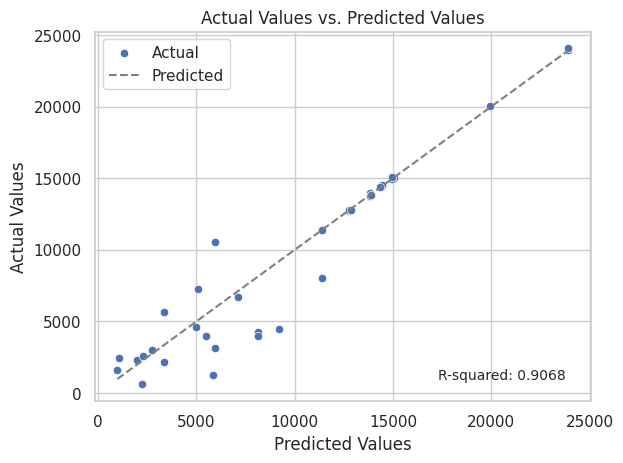

In [417]:
# 
plot_graph(df = evaluations['values_table'], 
           graph_type='scatter_line', 
           label1='Actual Values',
           label2='Predicted Values', 
           title='Actual Values vs. Predicted Values')
# 

In [418]:
# 
base_learners.show_gridsearch_results()
# 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000371,0.000077,0.000586,0.000126,1,{'n_neighbors': 1},0.841000,0.608121,0.887363,0.680558,0.422247,0.928936,0.767535,0.976304,0.584126,0.756899,0.745309,0.164440,4
1,0.000329,0.000014,0.000514,0.000017,2,{'n_neighbors': 2},0.844238,0.610294,0.932285,0.735121,0.499204,0.938424,0.779691,0.969325,0.608054,0.796522,0.771316,0.150667,1
2,0.000335,0.000030,0.000522,0.000017,3,{'n_neighbors': 3},0.842322,0.595516,0.899601,0.692629,0.453821,0.966832,0.774986,0.923542,0.620148,0.801093,0.757049,0.155729,2
3,0.000354,0.000025,0.000564,0.000089,4,{'n_neighbors': 4},0.839970,0.591315,0.893564,0.663273,0.491373,0.980681,0.755867,0.914635,0.547926,0.796078,0.747468,0.158601,3
4,0.000349,0.000030,0.000568,0.000064,5,{'n_neighbors': 5},0.895925,0.594712,0.821005,0.632979,0.440295,0.984016,0.738676,0.867384,0.526988,0.778860,0.728084,0.165679,5
5,0.000348,0.000018,0.000564,0.000048,6,{'n_neighbors': 6},0.889689,0.648802,0.728457,0.617250,0.431368,0.965106,0.723796,0.824544,0.476143,0.786384,0.709154,0.161715,6
6,0.000348,0.000024,0.000543,0.000007,7,{'n_neighbors': 7},0.891601,0.661135,0.658852,0.603143,0.546505,0.926007,0.730003,0.777480,0.420351,0.772348,0.698742,0.146377,7
7,0.000348,0.000017,0.000564,0.000048,9,{'n_neighbors': 9},0.846929,0.659553,0.616130,0.607879,0.687173,0.841535,0.713261,0.751171,0.310519,0.727944,0.676209,0.144413,8


### Stacked Learners (K-NN, and Lasso with Lasso as the meta estimator)

In [419]:
stacked_learner = StackedLearner(data, selected_features = data.columns[:-1].to_list())
# 
data_split = base_learners.show_data_split()

In [420]:
# 
data_split['train']
# 

,TeamExp,ManagerExp,YearEnd,Length,Transactions,Entities,PointsAdjust,Envergure,PointsNonAjust,Language,Effort
30,-1.248950,-0.018888,0.131773,0.007412,-0.619216,-0.525408,-0.696982,0.162186,-0.675359,0.840533,9135.000000
67,-0.498803,-0.001902,1.152470,0.953984,-0.490354,1.904772,0.325048,-1.197900,-0.008901,-0.816984,14969.962096
62,1.050009,0.819632,-0.897301,1.832558,3.069220,0.867987,2.863781,0.170628,2.742024,-0.150081,23898.320763
47,-1.248950,-1.705033,0.131773,-0.770875,-0.579577,-1.447553,-0.994572,-0.466877,-1.012184,2.506467,710.000000
42,1.044258,0.824184,0.131773,0.688413,0.659131,0.317047,0.656443,0.701383,0.767045,-0.825402,9520.000000
...,...,...,...,...,...,...,...,...,...,...,...
71,-1.248950,-1.705033,1.158783,-0.479017,-0.995783,-0.787251,-1.100563,-1.275671,-1.162765,-0.825402,2583.000000
14,-0.495158,-0.017136,0.109866,0.684620,1.053886,0.200062,0.921849,0.725381,1.049938,0.839811,13866.040390
92,0.279855,-0.018888,-0.895237,-1.062733,-0.871912,-1.322324,-1.190248,-0.017546,-1.158802,-0.825402,3136.000000
51,-0.484548,-1.705033,-1.922247,0.007412,-0.574622,-0.605099,-0.688829,0.701383,-0.604031,-0.825402,9051.000000


In [421]:
# 
data_split['test']
# 

,TeamExp,ManagerExp,YearEnd,Length,Transactions,Entities,PointsAdjust,Envergure,PointsNonAjust,Language,Effort
26,-0.472431,-0.022722,0.143340,0.679351,1.025065,0.195942,0.956430,0.689813,1.048224,0.850665,13746.008270
13,-1.248950,-1.705033,1.158783,-0.770875,0.936601,-1.333708,0.293627,-0.377010,0.160760,-0.825402,4620.000000
24,1.044258,-1.705033,1.158783,0.299269,0.208241,-0.992173,-0.183333,0.611517,-0.104738,-0.825402,10577.000000
21,-0.475002,0.843365,1.150256,-0.181917,0.321613,0.212459,0.304483,0.234532,0.335723,0.829760,11393.193024
15,-0.496335,-0.033229,1.133001,0.996950,-0.449018,1.883568,0.296364,-1.159078,-0.019603,-0.820223,14969.503918
29,-0.484548,-0.018888,-1.922247,-0.381732,-0.634080,-1.003557,-0.880428,-1.725002,-1.024072,0.840533,2275.000000
19,1.048734,0.828269,-0.861547,1.859603,3.151492,0.851736,2.815097,0.173133,2.745228,-0.158133,24059.461063
12,1.044258,-1.705033,-0.895237,-0.284446,-0.430932,1.273346,0.102028,0.431784,0.148872,-0.825402,3948.000000
8,-1.248950,-0.018888,0.131773,-0.673589,-1.089925,-1.527245,-1.442996,-0.466877,-1.412412,0.840533,1267.000000
16,-0.460527,-0.032977,-0.899507,-0.029503,-0.192936,-0.511525,-0.316550,0.226506,-0.331508,-0.825270,14366.050859


In [422]:
# 
stacked_learner_model = stacked_learner.learn()
# 
evaluations = stacked_learner.evaluate_model(stacked_learner_model, with_table = True, return_train_score = True)
# 

Best parameters: {'n_neighbors': 2}
Best score: 0.7717047207403731


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.672e+07, tolerance: 3.953e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.764e+07, tolerance: 3.887e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.200e+07, tolerance: 4.004e

Best hyperparameters: {'alpha': 99}
Best cross-validated score: 0.8340356401497655


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.672e+07, tolerance: 3.953e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.764e+07, tolerance: 3.887e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.200e+07, tolerance: 4.004e

Best hyperparameters: {'alpha': 99}
Best cross-validated score: 0.8340356401497655
Best parameters: {'final_estimator__fit_intercept': True}
Best score: 0.8357586283209194


In [423]:
evaluations['train_scores']

{'MSE': 3811341.9980829773,
 'RMSE': 1952.2658625512504,
 'MAE': 1420.9552809716386,
 'R^2': 0.9184143809933291,
 'unexplained_variance': 0.08158561900667094,
 'lasso_coefs': Empty DataFrame
 Columns: []
 Index: []}

In [424]:
evaluations['test_scores']

{'MSE': 7494780.0007039085,
 'RMSE': 2737.659584518117,
 'MAE': 1912.638070819492,
 'R^2': 0.8193340975001216,
 'unexplained_variance': 0.18066590249987835}

In [425]:
evaluations['values_table']

,Actual Values,Predicted Values
0,7252.000000,7581.061223
1,2149.000000,3174.674281
2,12710.730114,11799.918950
3,14446.029890,11082.345063
4,4277.000000,11933.806188
5,6699.000000,7825.340128
6,23940.000000,22750.909259
7,5635.000000,4865.772986
8,1267.000000,2486.103855
9,2989.000000,3099.065225


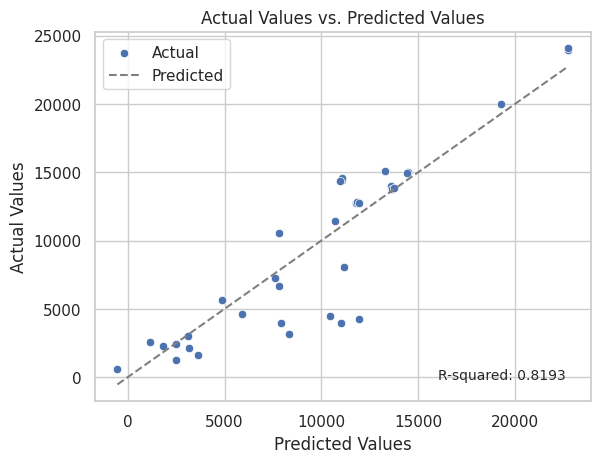

In [426]:
# 
plot_graph(df = evaluations['values_table'], 
           graph_type='scatter_line', 
           label1='Actual Values',
           label2='Predicted Values', 
           title='Actual Values vs. Predicted Values')
# 
# 

In [427]:
# 
stacked_learner.show_gridsearch_results()
# 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_final_estimator__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012205,0.000815,0.000766,0.000036,True,{'final_estimator__fit_intercept': True},0.803549,0.920322,0.821022,0.901773,0.732127,0.835759,0.068561,1
1,0.012941,0.003196,0.000747,0.000024,False,{'final_estimator__fit_intercept': False},0.807004,0.921642,0.824891,0.895428,0.720903,0.833974,0.070792,2


## Learning Algorithms (With clustering)

### Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

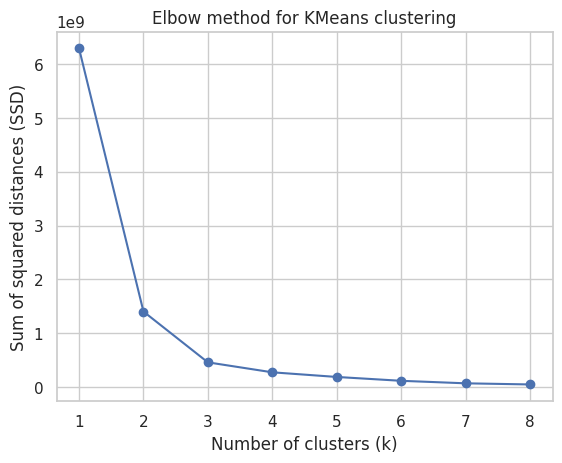

In [428]:
"""
In this code, X is the dataset that you want to cluster. The for loop iterates over values of k from 1 to 10, creating a KMeans model with k clusters, fitting the model to the data, and calculating the sum of squared distances for the points to their nearest cluster center. The ssd list stores these values for each value of k. Finally, the results are plotted using Matplotlib. The idea is to look for an "elbow" in the plot where the decrease in SSD starts to level off, indicating that additional clusters are not providing much additional information gain.

Note that while the elbow method can be a helpful guide in choosing the number of clusters, it is not always definitive and can sometimes be ambiguous.
"""

# create a list to store the sum of squared distances for each value of k
ssd = []

# try k values from 1 to N
N = 8
for k in range(1, N + 1):
    # create a KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    # fit the model to the data
    kmeans.fit(data)
    # calculate the sum of squared distances for the points to their nearest cluster center
    ssd.append(kmeans.inertia_)
    
# plot the results
plt.plot(range(1, N + 1), ssd, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSD)')
plt.title('Elbow method for KMeans clustering')
plt.show()


### Divide Data using K-Means Clustering

In [429]:
class DivideDataWithKMeans:
  """
    Divide data with KMeans
  """
  def __init__(self, dataframe, n_clusters):
    self.dataframe = dataframe
    self.n_clusters = n_clusters
    # 
    self.clustered_dataframe = dataframe.copy() # we don't want the orinal to get changed in anyway
  
  def divide_data(self) -> List:
    """
      Learners with Data Clusters using K-Means
    """
    # Perform k-means clustering with N clusters
    kmeans = KMeans(n_clusters=self.n_clusters)
    kmeans.fit(self.clustered_dataframe)

    # Add a column to the dataframe with the cluster labels
    self.clustered_dataframe['cluster'] = kmeans.labels_
    
    # Split the dataframe into a list of dataframes, one for each cluster
    clusters = []
    for i in range(self.n_clusters):
        cluster_df = self.clustered_dataframe[self.clustered_dataframe['cluster'] == i].drop('cluster', axis=1)
        clusters.append(cluster_df)
    
    return clusters

  def plot(self):
    """
      Plot two different clustered dataframes in the same scatter plot using PCA
    """
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(self.clustered_dataframe.iloc[:,:-1])
    self.clustered_dataframe['pca_1'] = pca_result[:,0]
    self.clustered_dataframe['pca_2'] = pca_result[:,1]
    
    sns.set(style='darkgrid')
    for i in range(self.n_clusters):
      sns.scatterplot(data=self.clustered_dataframe[self.clustered_dataframe['cluster'] == i],
                      x='pca_1', y='pca_2', label=f"Cluster {i + 1}")
      
    plt.xticks(rotation=60)
    plt.legend()
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('Clusters using PCA')
    plt.show()
 
class Clustering(DivideDataWithKMeans):
  """
    With Clustering
  """
  def __init__(self, dataframe: pd.DataFrame, n_clusters: int = 2):
    super().__init__(dataframe, n_clusters)

    # get clusters
    self.clusters = self.divide_data()

    # Instantiate Base Learners
    self.base_learners = {}
    for i, cluster_df in enumerate(self.clusters):
      self.base_learners[f"base_{i}"] = BaseLearners(cluster_df, 
                                                     selected_features = cluster_df.columns[:-1].to_list())
    
    # Param Grids
    self.param_grids = {
        'lasso': {'alpha': [i for i in range(1, 100)]},
        'knn': {'n_neighbors': [3, 5]}
    }

    # Model Training and Evaluations
    self.models = {}
    self.model_evaluations = {}
    for key, learner in self.base_learners.items():
      if "base" in key:
        lasso_model = learner.lasso(param_grid=self.param_grids['lasso'], scoring='r2')
        lasso_model_evaluation = learner.evaluate_model(lasso_model, with_table = True, return_train_score = True)
        # 
        self.models[f"lasso_{key}"] = lasso_model
        self.model_evaluations[f"lasso_{key}"] = lasso_model_evaluation
        # 
        knn_model = learner.knn(param_grid=self.param_grids['knn'], scoring='r2')
        knn_model_evaluation = learner.evaluate_model(knn_model, with_table = True, return_train_score = True)
        # 
        self.models[f"knn_{key}"] = knn_model
        self.model_evaluations[f"knn_{key}"] = knn_model_evaluation
    
    # Instantiate Stacked Learner (with main dataframe)
    list_of_base_learners = dict_to_list_of_tuples(self.models)
    self.base_learners[f"stacked_learner(with_kmeans)"] = StackedLearner(self.dataframe, 
                                                                    selected_features = self.dataframe.columns[:-1].to_list(), 
                                                                    learners = list_of_base_learners, n_cv = 10)
    
    stacked_model = self.base_learners[f"stacked_learner(with_kmeans)"].learn()
    stacked_model_evaluation = self.base_learners[f"stacked_learner(with_kmeans)"].evaluate_model(stacked_model, with_table = True, return_train_score = True)
    # 
    self.models[f"stacked_learner(with_kmeans)"] = stacked_model
    self.model_evaluations[f"stacked_learner(with_kmeans)"] = stacked_model_evaluation
   
  def evaluate(self):
    """
      Return models evaluation results in a certain format such as results{'model_name': []}
    """
    results = {}
    for key, evaluation in self.model_evaluations.items():
      key_split = key.split("_")[0].strip()
      if key_split not in results:
        results[key_split] = []
        results[key_split].append(evaluation)
      else:
        results[key_split].append(evaluation)
    
    return results
# 

In [430]:
# 
clustering = Clustering(data)
# 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best hyperparameters: {'alpha': 2}
Best cross-validated score: 0.9928274058580012
Best parameters: {'n_neighbors': 3}
Best score: 0.9742852708156766


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.119e+04, tolerance: 1.740e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.141e+04, tolerance: 1.903e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.102e+04, tolerance: 1.963e

Best hyperparameters: {'alpha': 99}
Best cross-validated score: -4.545115334458496
Best parameters: {'n_neighbors': 5}
Best score: -2.343554486142792


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.474e+07, tolerance: 4.308e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.442e+07, tolerance: 4.367e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.235e+07, tolerance: 4.414e

Best hyperparameters: {'alpha': 99}
Best cross-validated score: 0.8204992062042409


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.208e+06, tolerance: 4.308e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.319e+07, tolerance: 3.568e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+07, tolerance: 3.612e

Best parameters: {'final_estimator__fit_intercept': False}
Best score: 0.7947591313286573


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.052e+08, tolerance: 1.337e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+07, tolerance: 4.422e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.887e+07, tolerance: 3.625e

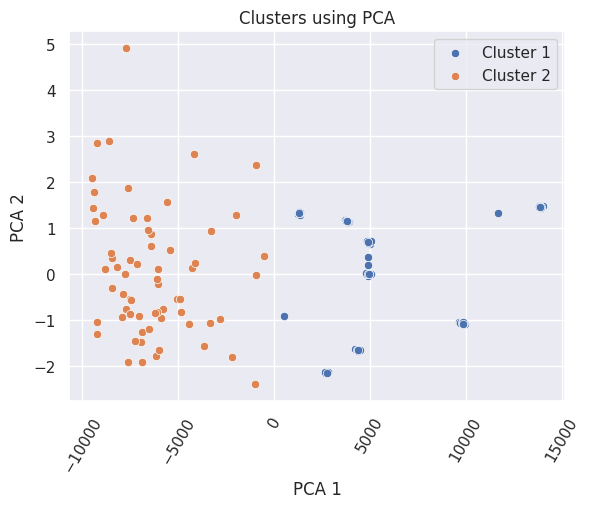

In [431]:
# 
clustering.plot()
# 

In [432]:
# 
results = clustering.evaluate()
# 

### Lasso

In [433]:
lasso_model = results['lasso']
first_cluster = lasso_model[0]
second_cluster = lasso_model[1]
# 

#### First Cluster

In [434]:
first_cluster['train_scores']

{'MSE': 56470.65900849775,
 'RMSE': 237.63555922567176,
 'MAE': 113.26985494354741,
 'R^2': 0.9961711976385146,
 'unexplained_variance': 0.003828802361485417,
 'lasso_coefs':          Features  Coefficient Estimate
 0         TeamExp           1439.186810
 1      ManagerExp           1431.338956
 2         YearEnd          -1923.314046
 3          Length           2384.191605
 4    Transactions            412.774787
 5        Entities              0.000000
 6    PointsAdjust              7.316423
 7       Envergure          -1550.177443
 8  PointsNonAjust              0.000000
 9        Language            -47.297889}

In [435]:
first_cluster['train_scores']['lasso_coefs']
# 

,Features,Coefficient Estimate
0,TeamExp,1439.186810
1,ManagerExp,1431.338956
2,YearEnd,-1923.314046
3,Length,2384.191605
4,Transactions,412.774787
5,Entities,0.000000
6,PointsAdjust,7.316423
7,Envergure,-1550.177443
8,PointsNonAjust,0.000000
9,Language,-47.297889


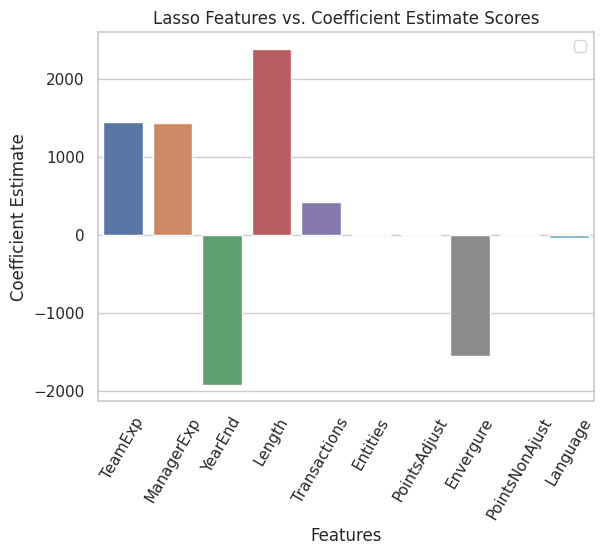

In [436]:
plot_graph(df = first_cluster['train_scores']['lasso_coefs'], 
           graph_type='bar', 
           label1='Features',
           label2='Coefficient Estimate', 
           title='Lasso Features vs. Coefficient Estimate Scores')
# 
# 

In [437]:
first_cluster['test_scores']

{'MSE': 18013.17900620636,
 'RMSE': 134.21318491938993,
 'MAE': 100.08988021048735,
 'R^2': 0.9986963168253506,
 'unexplained_variance': 0.0013036831746493505}

In [438]:
first_cluster['values_table']

,Actual Values,Predicted Values
0,11393.193024,11470.532889
1,23955.839902,23678.943710
2,13856.608009,13763.352556
3,11328.384606,11466.108821
4,14488.895946,14501.141216
5,14987.000000,14942.534892
6,12788.787051,12824.621767
7,14940.873595,15148.817161
8,12710.730114,12896.329755
9,19914.818065,19886.140399


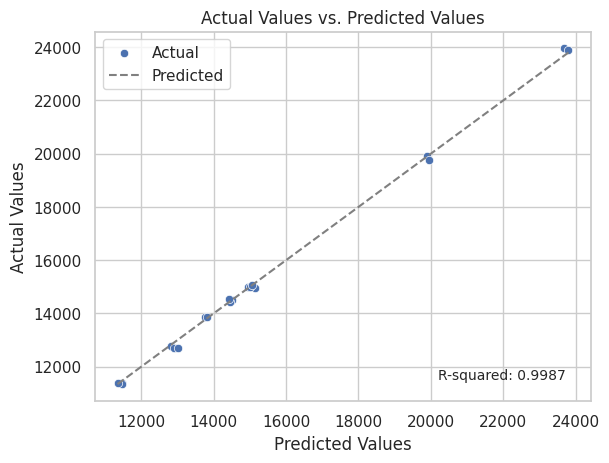

In [439]:
# 
plot_graph(df = first_cluster['values_table'], 
           graph_type='scatter_line', 
           label1='Actual Values',
           label2='Predicted Values', 
           title='Actual Values vs. Predicted Values')
# 
# 

#### Second Cluster

In [440]:
second_cluster['train_scores']

{'MSE': 2209822.535554146,
 'RMSE': 1486.5471857812472,
 'MAE': 1110.4714958440584,
 'R^2': 0.546162307796825,
 'unexplained_variance': 0.45383769220317505,
 'lasso_coefs':          Features  Coefficient Estimate
 0         TeamExp           -201.003138
 1      ManagerExp            139.324419
 2         YearEnd            -95.660929
 3          Length            748.592962
 4    Transactions              0.000000
 5        Entities            189.304393
 6    PointsAdjust              0.000000
 7       Envergure            749.481607
 8  PointsNonAjust            956.325704
 9        Language           -476.752791}

In [441]:
second_cluster['train_scores']['lasso_coefs']

,Features,Coefficient Estimate
0,TeamExp,-201.003138
1,ManagerExp,139.324419
2,YearEnd,-95.660929
3,Length,748.592962
4,Transactions,0.000000
5,Entities,189.304393
6,PointsAdjust,0.000000
7,Envergure,749.481607
8,PointsNonAjust,956.325704
9,Language,-476.752791


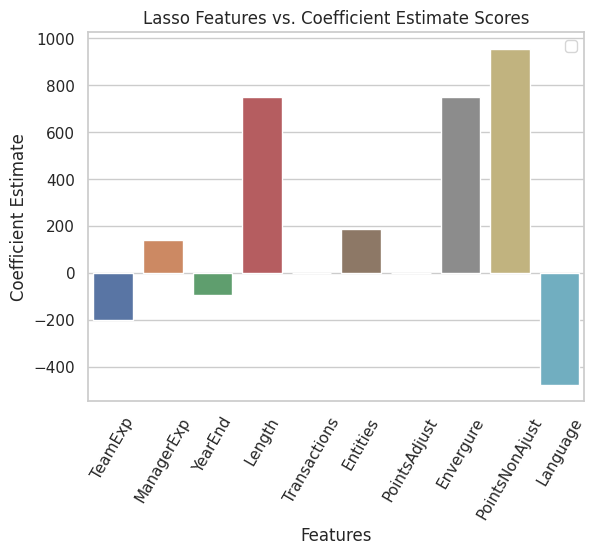

In [442]:
# 
plot_graph(df = second_cluster['train_scores']['lasso_coefs'], 
           graph_type='bar', 
           label1='Features',
           label2='Coefficient Estimate', 
           title='Lasso Features vs. Coefficient Estimate Scores')
# 

In [443]:
second_cluster['test_scores']

{'MSE': 2458814.842725537,
 'RMSE': 1568.060854280068,
 'MAE': 1181.5169751642923,
 'R^2': 0.61112205706428,
 'unexplained_variance': 0.38887794293572}

In [444]:
second_cluster['values_table']

,Actual Values,Predicted Values
0,2422.0,3144.714921
1,847.0,1305.245754
2,4277.0,6421.140977
3,3136.0,3645.058605
4,1435.0,3143.683121
5,5922.0,4239.445273
6,9520.0,7512.422884
7,1155.0,1478.169004
8,2821.0,4231.207053
9,5180.0,5655.482507


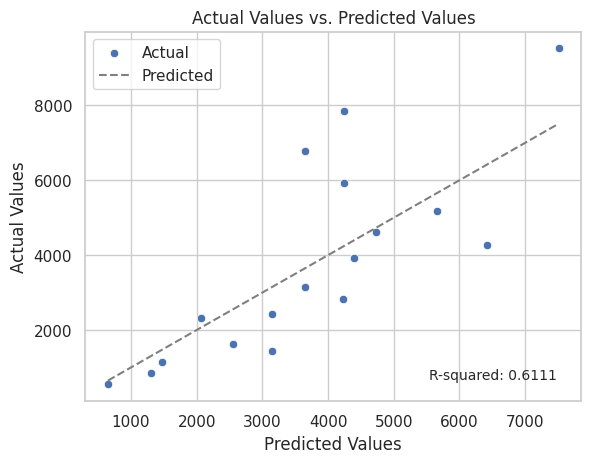

In [445]:
# 
plot_graph(df = second_cluster['values_table'], 
           graph_type='scatter_line', 
           label1='Actual Values',
           label2='Predicted Values', 
           title='Actual Values vs. Predicted Values')
# 
# 

### K-NN

In [446]:
# 
knn_model = results['knn']
first_cluster = knn_model[0]
second_cluster = knn_model[1]
# 

#### First Cluster

In [447]:
first_cluster['train_scores']

{'MSE': 167033.97582698648,
 'RMSE': 408.69790289037024,
 'MAE': 124.42385827358666,
 'R^2': 0.9886748252575125,
 'unexplained_variance': 0.01132517474248751,
 'lasso_coefs': Empty DataFrame
 Columns: []
 Index: []}

In [448]:
first_cluster['test_scores']

{'MSE': 4523.826504635181,
 'RMSE': 67.25939714742603,
 'MAE': 53.8494770947196,
 'R^2': 0.9996725932442523,
 'unexplained_variance': 0.0003274067557477167}

In [449]:
first_cluster['values_table']

,Actual Values,Predicted Values
0,11393.193024,11367.985250
1,23955.839902,23927.184825
2,13856.608009,13845.652207
3,11328.384606,11392.653423
4,14488.895946,14389.231142
5,14987.000000,14981.716297
6,12788.787051,12774.039618
7,14940.873595,15028.757948
8,12710.730114,12774.039618
9,19914.818065,19871.798721


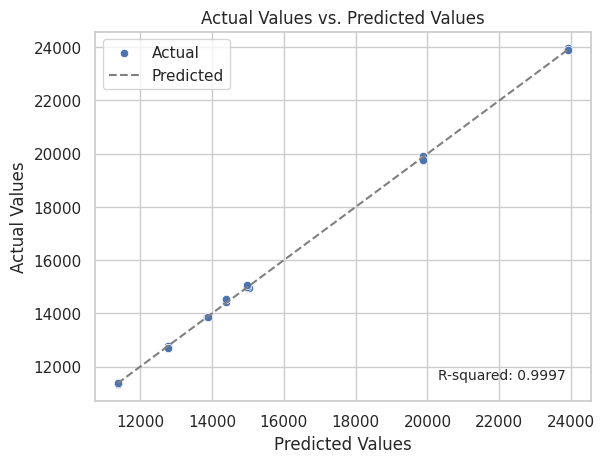

In [450]:
# 
plot_graph(df = first_cluster['values_table'], 
           graph_type='scatter_line', 
           label1='Actual Values',
           label2='Predicted Values', 
           title='Actual Values vs. Predicted Values')
# 
# 

#### Second Cluster

In [451]:
second_cluster['train_scores']

{'MSE': 2814531.3808333334,
 'RMSE': 1677.6565145563418,
 'MAE': 1212.2208333333335,
 'R^2': 0.4219714904887132,
 'unexplained_variance': 0.5780285095112868,
 'lasso_coefs': Empty DataFrame
 Columns: []
 Index: []}

In [452]:
second_cluster['test_scores']

{'MSE': 2048936.3835294119,
 'RMSE': 1431.4106271540015,
 'MAE': 1211.8235294117646,
 'R^2': 0.6759470651519848,
 'unexplained_variance': 0.32405293484801523}

In [453]:
second_cluster['values_table']

,Actual Values,Predicted Values
0,2422.0,3043.6
1,847.0,2193.8
2,4277.0,5280.8
3,3136.0,2399.6
4,1435.0,3712.8
5,5922.0,4608.8
6,9520.0,7030.8
7,1155.0,2658.6
8,2821.0,4312.0
9,5180.0,5107.2


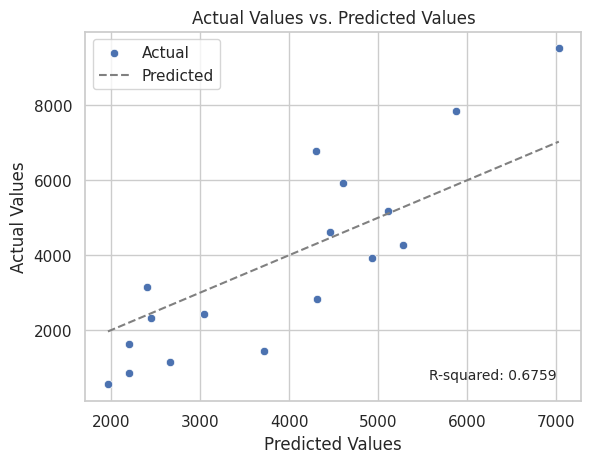

In [454]:
# 
plot_graph(df = second_cluster['values_table'], 
           graph_type='scatter_line', 
           label1='Actual Values',
           label2='Predicted Values', 
           title='Actual Values vs. Predicted Values')
# 
# 

### Stacked Learners (K-NN, and Lasso with Lasso as the meta estimator)

In [455]:
# 
stacked_model_with_kmeans = results['stacked'][0]
# 

In [456]:
stacked_model_with_kmeans['train_scores']

{'MSE': 4091698.523858084,
 'RMSE': 2022.7947310239078,
 'MAE': 1500.417997421827,
 'R^2': 0.9124130668343199,
 'unexplained_variance': 0.08758693316568011,
 'lasso_coefs': Empty DataFrame
 Columns: []
 Index: []}

In [457]:
stacked_model_with_kmeans['test_scores']

{'MSE': 9024706.578006933,
 'RMSE': 3004.114940878084,
 'MAE': 2150.7769556887138,
 'R^2': 0.7824543537556701,
 'unexplained_variance': 0.21754564624432993}

In [458]:
stacked_model_with_kmeans['values_table']

,Actual Values,Predicted Values
0,7252.000000,6831.067010
1,2149.000000,3414.089515
2,12710.730114,11586.444351
3,14446.029890,10941.552500
4,4277.000000,12777.040861
5,6699.000000,8583.958168
6,23940.000000,22146.064713
7,5635.000000,5860.092563
8,1267.000000,2618.492066
9,2989.000000,3808.050651


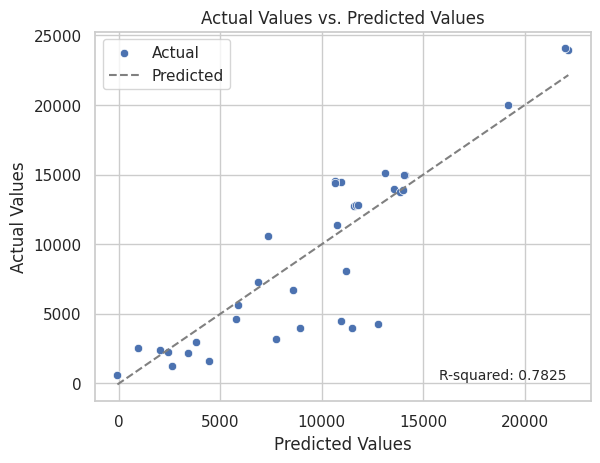

In [459]:
# 
plot_graph(df = stacked_model_with_kmeans['values_table'], 
           graph_type='scatter_line', 
           label1='Actual Values',
           label2='Predicted Values', 
           title='Actual Values vs. Predicted Values')
# 

## Others [Not used]

In [460]:
# first_cluster = stacked_model[0]
# second_cluster = stacked_model[1]
# second_cluster['train_scores']
# second_cluster['test_scores']
# second_cluster['values_table']
# # 
# plot_graph(df = second_cluster['values_table'], 
#            graph_type='scatter_line', 
#            label1='Actual Values',
#            label2='Predicted Values', 
#            title='Actual Values vs. Predicted Values')
# # 
# # 

In [461]:
# # 
# for i, cluster_df in enumerate(clusters):
#   print(f"Cluster {i}:")
#   # Print the first 5 rows of each cluster dataframe
#   # print(cluster_df.head())
#   # print(cluster_df.columns)
#   stacked_learner = StackedLearner(data, selected_features = data.columns[:-1].to_list())
#   stacked_learner_model = stacked_learner.learn()
#   evaluate_model = stacked_learner.evaluate_model(stacked_learner_model, with_table = True, return_train_score = True)
#   print(evaluate_model)
#   print()
# # 
# # 

In [462]:
# desh_rmse_val=[] #to store rmse values for different k
# for K in range(20):
#     K=K+1
#     the_model=KNeighborsRegressor(n_neighbors=K)
#     the_model.fit(desh_X_train, desh_Y_train)#fit the model
#     pred=the_model.predict(desh_X_test)#make prediction on test set
#     error = sqrt(mean_squared_error(desh_Y_test,pred))#calculate rmse
#     desh_rmse_val.append(error)#store rmse values
#     print('RMSE value for k= ',K, ' is: ',error)


# #plotting the rmse values against k values
# curve = pd.DataFrame(desh_rmse_val)
# curve.plot()


In [463]:
  # def _k_means(self, n_clusters: int = 2, algorithm: str = 'auto', **kwargs):
  #   """
  #     K-Means:

  #     algorithm : {"lloyd", "elkan", "auto", "full"}
  #     algorithm='lloyd'
  #     max_iter=300
  #     tol=0.0001
  #   """
  #   # Create a KMeans model with 3 clusters
  #   kmeans = KMeans(n_clusters=n_clusters, random_state=42, **kwargs)

  #   # Fit the model to the data
  #   kmeans.fit(self.X)

  #   # Get the predicted labels for each data point
  #   labels = kmeans.predict(self.X)
  #   print(labels)

  #   # Score
  #   print(kmeans.score(self.X))

  #   # Plot the data points colored by cluster
  #   plt.scatter(self.X[:, 0], self.X[:, 1], c=labels)
  #   plt.show()
  #   return kmeans
# 
# 
  # base_learners = BaseLearners(data, selected_features = data.columns[:-1].to_list())
# # 
# kmeans_model = base_learners._k_means()
# 

In [464]:
# class CentralisedFS:
#     """
#         Centralised Approach
#     """
#     def __init__(self, training_data: np.array, training_labels: list, set_of_features: list):
#         super().__init__(training_data, training_labels, set_of_features) 

#         self.dataframe = pd.DataFrame()
        
#     def execute(self):
#         """
#             Centralised FS 
#         """
#         # 
#         self.final_feature_sets = {}
#         _data = []
#         # 
#         for index,technique in enumerate(self.fs_techniques):
#             self._randomize_training_data()

#             print(f'[{index+ 1}] {technique}:')
            
#             start_time = time.time()
#             features_selected, _ = self._apply_feature_selection_algo(dataset = [self.training_data, np.array(self.training_labels)], algo = technique, k = random.randint(1000, 4754)) # mutual_info, correlation, chi_squared, symmetrical_uncertainty, consistency, info_gain_ratio
#             end_time = time.time()
            
#             feature_pct = len(features_selected)/len(self.set_of_features) * 100
#             time_taken = end_time-start_time
#             # print(features_selected)
#             self.final_feature_sets[technique] = features_selected

#             _data.append([technique, feature_pct, time_taken, features_selected])
        
#             print(f'Final Feature Selected Percentage[{technique}] => {feature_pct}')
#             print(f'Time Taken[{technique}] => {time_taken}')
          
#         self.dataframe = pd.DataFrame(_data, columns=['FS Method', 'Final Feature Selected Percentage', 'Time Taken', 'Features Selected'])
#         # print(self.final_feature_set)
#         # [1] rfe_svm:
#         # Final Feature Selected Percentage[rfe_svm] => 3.506311360448808
#         # Time Taken[rfe_svm] => 57.15518379211426
#         return self.final_feature_sets
# 

In [465]:
# training_data.drop(['Effort'], axis=1, inplace=True) # 'Project'
# # 
# td = training_data.to_numpy()
# # print(td[39])
# # 
# set_of_features = training_data.columns.to_list()
# # 
# CFS = CentralisedFS(training_data=td, training_labels=labels, set_of_features=set_of_features)
# # 
# # CFS.execute()
# # 
# 
# CFS.final_feature_sets, len(CFS.final_feature_sets)
# print(len(list(CFS.final_feature_set.keys())))
# 
# CFS.dataframe

# 
# SPLIT DATASET:
# 
# # train/test split

# # train_data = data.iloc[:30]
# # train_data

# # test_data = data.iloc[30:]
# # test_data

# def split_data(_data: pd.DataFrame, train_ratio: float = 0.81, class_dist_list: list = [10, 10, 10, 6, 4]):
#     """
#         Split Data
#     """
#     # convert data['Effort'] into class using: 
#     # Class: Effort  | # of cases
#     # 1: 0 - 1500    | 11
#     # 2: 1500 - 3000 | 21
#     # 3: 3000 - 4500 | 20
#     # 4: 4500 - 8000 | 14
#     # 5: > 8000      | 15
#     # 
#     train_data = []
#     test_data = []

#     count = 0
#     for _, class_dist in enumerate(class_dist_list):
#         # split data in 2 parts => 7/3
#         _class = data.iloc[count:class_dist + count]
#         # print(_class)
#         s = round(0.7 * len(_class))
#         # print(_class[:s].shape)
#         train_data.append(_class[:s])
#         # print(_class[s:].shape)
#         test_data.append(_class[s:])
#         count = count + class_dist
        
#     # print(test_data)
#     con_train_data = pd.concat(train_data) #, pd.concat(test_data)
#     con_train_data = con_train_data.reset_index().drop(['index'], axis=1)
#     # 
#     con_test_data = pd.concat(test_data) #, pd.concat(test_data)
#     con_test_data = con_test_data.reset_index().drop(['index'], axis=1)
#     # con_train_data
#     return con_train_data, con_test_data
# #


# # data.iloc[10:20]
# train_data, test_data = split_data(data)
# # 
# labels = train_data['Effort'].values.tolist()
# # 
# training_data = train_data
# # 